# Kickstartin' Success

By: Aditi Lakra, Natasha Nath, Priscilla Mannuel, Suryoday Roy

<a href="https://www.vecteezy.com/vector-art/131197-money-team"><img src="header.jpg"></a>

In this study, we will explore [data](https://webrobots.io/kickstarter-datasets/) on Kickstarter projects and build a model to predict campaign success or failure as well as explore the drivingfactors.

* [Introduction](#intro)
* [Initialization](#init)
* [Predictive Model](#model)
* [Evaluation](#eval)
* [Implementation](#imple)
* [Implications](#impli)
* [Future Work](#fw)

<h4><center>...</center></h4>

<a id='intro'><h2>Introduction</h2></a>

Nowadays if you have a great idea but not the means, crowdsourcing on Kickstarter sounds compelling. However, only 44% percent of campaigns on Kickstarter reaches their funding goal. Before you jump into Kickstarter, how do you know if it's the right platform for you? What makes a successful Kickstarter campaign? What is a realistic funding goal? By leveraging the tools and power of data analytics, we seek to answer these questions and build a model to predict the success (or failure) of a potential campaign.

<h2><a id='intro'>Initialization</a></h2>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os, json
from scipy.stats import skew
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
from sklearn.preprocessing import normalize, scale

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

A large dataset provided by [Web Robots](https://webrobots.io/kickstarter-datasets/) was used to train the model. The dataset contains kickstarter campaigns collected monthly through webscrapping. Each dataset is composed of all kickstarter campaigns up to a set maximum for each category. We utilized the data collected up until January 2018.

In [33]:
path = 'C:\\Users\\Natasha\\OneDrive\\jupyter-workspace\\PredictingKickstarterSuccess\\'

In [34]:
data = pd.read_csv(path+'Kickstarter_2018-01_old.csv',error_bad_lines=False)

b'Skipping line 105: expected 86 fields, saw 89\nSkipping line 139: expected 86 fields, saw 90\nSkipping line 141: expected 86 fields, saw 87\nSkipping line 162: expected 86 fields, saw 90\nSkipping line 181: expected 86 fields, saw 89\nSkipping line 198: expected 86 fields, saw 89\nSkipping line 203: expected 86 fields, saw 87\nSkipping line 208: expected 86 fields, saw 89\nSkipping line 211: expected 86 fields, saw 89\nSkipping line 214: expected 86 fields, saw 87\nSkipping line 227: expected 86 fields, saw 87\nSkipping line 229: expected 86 fields, saw 90\nSkipping line 234: expected 86 fields, saw 87\nSkipping line 244: expected 86 fields, saw 89\nSkipping line 250: expected 86 fields, saw 89\nSkipping line 262: expected 86 fields, saw 87\nSkipping line 263: expected 86 fields, saw 89\nSkipping line 338: expected 86 fields, saw 89\nSkipping line 361: expected 86 fields, saw 90\nSkipping line 986: expected 86 fields, saw 87\nSkipping line 992: expected 86 fields, saw 90\nSkipping li

b'Skipping line 8541: expected 86 fields, saw 89\nSkipping line 8559: expected 86 fields, saw 90\nSkipping line 8562: expected 86 fields, saw 87\nSkipping line 8567: expected 86 fields, saw 87\nSkipping line 8591: expected 86 fields, saw 87\nSkipping line 8592: expected 86 fields, saw 87\nSkipping line 8601: expected 86 fields, saw 90\nSkipping line 8623: expected 86 fields, saw 89\nSkipping line 8625: expected 86 fields, saw 87\nSkipping line 8653: expected 86 fields, saw 89\nSkipping line 8657: expected 86 fields, saw 87\nSkipping line 8673: expected 86 fields, saw 87\nSkipping line 8687: expected 86 fields, saw 89\nSkipping line 8692: expected 86 fields, saw 90\nSkipping line 8697: expected 86 fields, saw 87\nSkipping line 8698: expected 86 fields, saw 87\nSkipping line 8701: expected 86 fields, saw 87\nSkipping line 8705: expected 86 fields, saw 87\nSkipping line 8751: expected 86 fields, saw 87\nSkipping line 9153: expected 86 fields, saw 89\nSkipping line 9159: expected 86 fields

b'Skipping line 25328: expected 89 fields, saw 90\nSkipping line 25352: expected 89 fields, saw 90\nSkipping line 25364: expected 89 fields, saw 90\nSkipping line 25408: expected 89 fields, saw 90\nSkipping line 25410: expected 89 fields, saw 90\nSkipping line 25534: expected 89 fields, saw 90\nSkipping line 25558: expected 89 fields, saw 90\nSkipping line 25663: expected 89 fields, saw 90\nSkipping line 25734: expected 89 fields, saw 90\nSkipping line 26022: expected 89 fields, saw 90\nSkipping line 26026: expected 89 fields, saw 90\nSkipping line 26052: expected 89 fields, saw 90\nSkipping line 26055: expected 89 fields, saw 90\nSkipping line 26064: expected 89 fields, saw 90\nSkipping line 26086: expected 89 fields, saw 90\nSkipping line 26104: expected 89 fields, saw 90\nSkipping line 26133: expected 89 fields, saw 90\nSkipping line 26149: expected 89 fields, saw 90\nSkipping line 26176: expected 89 fields, saw 90\nSkipping line 26182: expected 89 fields, saw 90\nSkipping line 2618

b'Skipping line 50142: expected 89 fields, saw 90\nSkipping line 51499: expected 89 fields, saw 90\nSkipping line 51550: expected 89 fields, saw 90\nSkipping line 51568: expected 89 fields, saw 90\nSkipping line 52233: expected 89 fields, saw 90\nSkipping line 52246: expected 89 fields, saw 90\nSkipping line 52283: expected 89 fields, saw 90\nSkipping line 52286: expected 89 fields, saw 90\nSkipping line 52326: expected 89 fields, saw 90\nSkipping line 52334: expected 89 fields, saw 90\nSkipping line 52366: expected 89 fields, saw 90\nSkipping line 52436: expected 89 fields, saw 90\nSkipping line 52483: expected 89 fields, saw 90\nSkipping line 52614: expected 89 fields, saw 90\nSkipping line 52642: expected 89 fields, saw 90\nSkipping line 52651: expected 89 fields, saw 90\nSkipping line 52794: expected 89 fields, saw 90\nSkipping line 52835: expected 89 fields, saw 90\nSkipping line 52916: expected 89 fields, saw 90\nSkipping line 52923: expected 89 fields, saw 90\nSkipping line 5311

b'Skipping line 86507: expected 89 fields, saw 90\nSkipping line 86563: expected 89 fields, saw 90\nSkipping line 86592: expected 89 fields, saw 90\nSkipping line 89140: expected 89 fields, saw 90\nSkipping line 89895: expected 89 fields, saw 90\nSkipping line 89939: expected 89 fields, saw 90\nSkipping line 90015: expected 89 fields, saw 90\nSkipping line 90059: expected 89 fields, saw 90\nSkipping line 90671: expected 89 fields, saw 90\n'
b'Skipping line 92122: expected 89 fields, saw 90\nSkipping line 92163: expected 89 fields, saw 90\nSkipping line 92999: expected 89 fields, saw 90\nSkipping line 93623: expected 89 fields, saw 90\nSkipping line 93666: expected 89 fields, saw 90\nSkipping line 93700: expected 89 fields, saw 90\nSkipping line 93773: expected 89 fields, saw 90\nSkipping line 93980: expected 89 fields, saw 90\nSkipping line 94219: expected 89 fields, saw 90\nSkipping line 94423: expected 89 fields, saw 90\nSkipping line 94433: expected 89 fields, saw 90\nSkipping line 

b'Skipping line 99645: expected 89 fields, saw 90\nSkipping line 99674: expected 89 fields, saw 90\nSkipping line 99727: expected 89 fields, saw 90\nSkipping line 99753: expected 89 fields, saw 90\nSkipping line 100672: expected 89 fields, saw 90\nSkipping line 100953: expected 89 fields, saw 90\nSkipping line 101009: expected 89 fields, saw 93\nSkipping line 101010: expected 89 fields, saw 93\nSkipping line 101011: expected 89 fields, saw 93\nSkipping line 101012: expected 89 fields, saw 93\nSkipping line 101013: expected 89 fields, saw 93\nSkipping line 101014: expected 89 fields, saw 93\nSkipping line 101015: expected 89 fields, saw 93\nSkipping line 101016: expected 89 fields, saw 93\nSkipping line 101017: expected 89 fields, saw 93\nSkipping line 101018: expected 89 fields, saw 93\nSkipping line 101019: expected 89 fields, saw 93\nSkipping line 101020: expected 89 fields, saw 93\nSkipping line 101021: expected 89 fields, saw 93\nSkipping line 101022: expected 89 fields, saw 93\nSk

b'Skipping line 108137: expected 89 fields, saw 90\nSkipping line 108155: expected 89 fields, saw 90\nSkipping line 108162: expected 89 fields, saw 90\nSkipping line 108221: expected 89 fields, saw 90\nSkipping line 108255: expected 89 fields, saw 90\nSkipping line 108259: expected 89 fields, saw 90\nSkipping line 108260: expected 89 fields, saw 90\nSkipping line 108297: expected 89 fields, saw 90\nSkipping line 108301: expected 89 fields, saw 90\nSkipping line 108307: expected 89 fields, saw 90\nSkipping line 108311: expected 89 fields, saw 90\nSkipping line 108314: expected 89 fields, saw 90\nSkipping line 108315: expected 89 fields, saw 90\nSkipping line 108332: expected 89 fields, saw 90\nSkipping line 108334: expected 89 fields, saw 90\nSkipping line 108341: expected 89 fields, saw 90\nSkipping line 108376: expected 89 fields, saw 90\nSkipping line 108385: expected 89 fields, saw 90\nSkipping line 108386: expected 89 fields, saw 90\nSkipping line 108388: expected 89 fields, saw 90

b'Skipping line 116953: expected 89 fields, saw 90\nSkipping line 116958: expected 89 fields, saw 90\nSkipping line 117033: expected 89 fields, saw 90\nSkipping line 117037: expected 89 fields, saw 90\nSkipping line 117302: expected 89 fields, saw 90\nSkipping line 117321: expected 89 fields, saw 90\nSkipping line 117335: expected 89 fields, saw 90\nSkipping line 117435: expected 89 fields, saw 90\nSkipping line 117623: expected 89 fields, saw 90\nSkipping line 119054: expected 89 fields, saw 90\nSkipping line 119493: expected 89 fields, saw 90\nSkipping line 120912: expected 89 fields, saw 90\nSkipping line 121296: expected 89 fields, saw 90\nSkipping line 122100: expected 89 fields, saw 90\nSkipping line 122128: expected 89 fields, saw 90\nSkipping line 122133: expected 89 fields, saw 90\nSkipping line 122416: expected 89 fields, saw 90\nSkipping line 122457: expected 89 fields, saw 90\nSkipping line 122462: expected 89 fields, saw 90\nSkipping line 122660: expected 89 fields, saw 90

b'Skipping line 166379: expected 89 fields, saw 90\nSkipping line 166417: expected 89 fields, saw 90\nSkipping line 166432: expected 89 fields, saw 90\nSkipping line 166448: expected 89 fields, saw 90\nSkipping line 166543: expected 89 fields, saw 90\nSkipping line 167147: expected 89 fields, saw 90\nSkipping line 167182: expected 89 fields, saw 90\nSkipping line 167674: expected 89 fields, saw 90\nSkipping line 167681: expected 89 fields, saw 90\nSkipping line 168105: expected 89 fields, saw 90\nSkipping line 169052: expected 89 fields, saw 90\nSkipping line 169092: expected 89 fields, saw 90\nSkipping line 169366: expected 89 fields, saw 90\nSkipping line 169406: expected 89 fields, saw 90\nSkipping line 169474: expected 89 fields, saw 90\nSkipping line 169616: expected 89 fields, saw 90\nSkipping line 169795: expected 89 fields, saw 90\nSkipping line 169865: expected 89 fields, saw 90\nSkipping line 169881: expected 89 fields, saw 90\nSkipping line 169912: expected 89 fields, saw 90

b'Skipping line 190738: expected 89 fields, saw 90\nSkipping line 190796: expected 89 fields, saw 90\nSkipping line 190798: expected 89 fields, saw 90\nSkipping line 190927: expected 89 fields, saw 90\nSkipping line 191925: expected 89 fields, saw 90\nSkipping line 191945: expected 89 fields, saw 90\nSkipping line 191983: expected 89 fields, saw 90\nSkipping line 192021: expected 89 fields, saw 90\nSkipping line 192063: expected 89 fields, saw 90\nSkipping line 192389: expected 89 fields, saw 90\nSkipping line 193309: expected 89 fields, saw 90\nSkipping line 194216: expected 89 fields, saw 90\nSkipping line 195236: expected 89 fields, saw 90\nSkipping line 195269: expected 89 fields, saw 90\nSkipping line 195792: expected 89 fields, saw 90\nSkipping line 195947: expected 89 fields, saw 90\nSkipping line 196131: expected 89 fields, saw 90\nSkipping line 196141: expected 89 fields, saw 90\nSkipping line 196756: expected 89 fields, saw 90\n'


In [8]:
%%capture
# Download dataset
# Check if the dataset is present on local disk and load it
if os.path.exists('Kickstarter_2018-01.csv'):
    data = pd.read_csv('Kickstarter_2018-01.csv', error_bad_lines=False)

In [35]:
# Print the size of the dataset
print ("Number of rows:", data.shape[0])
print ("Number of columns: ", data.shape[1])

Number of rows: 194475
Number of columns:  86


<h2><a id='model'>Predictive Model</a></h2>

**Summary**

The initial dataset contained 194475 transactions with 86 time-series, categorical and numerical variables. In order to build the final model, the process is brokened down into (1) [Data cleaning](#s1), (2) [Feature engineering](#s2) (3) [Exploratory data analysis](#s3) and (4) [Building the model](#s4).

**Note:** The code to make predictions is provided in a function as success_predictor.py

<h3><a id='s1'>Data Cleaning</a></h3>

In [36]:
# define a function to clean a loaded dataset

def clean(mydata):
    
    """
    This function cleans the input dataframe mydata:
    
    input:
        mydata: pandas.dataframe
    output: 
        pandas.dataframe

    """
    
    data = mydata.copy()
    
    #get rid of uneccessary columns in training and testing
    selected_cols = ['backers_count',
                     'blurb',
                     'category.id',
                     'category.name',
                     'category.parent_id',
                     'category.slug',
                     'country',
                     'created_at',
                     'currency',  ## Added by NN
                     'deadline',
                     'goal',
                     'launched_at',
                     'name',
                     'spotlight',
                     'staff_pick',
                     'state',
                     'usd_pledged',
                     'usd_type']
    
    data = data[selected_cols]

    #drop data with empty blurb or empty name entries
    #given more time, webscrapped missing entries
    data = data.dropna() 

    #select only data with known status
    successful = data['state'] == "successful"
    failed = data['state'] == "failed"
    cancelled = data['state'] == "cancelled"
    suspended = data['state'] == "suspended"
    data = data.loc[failed | successful | cancelled | suspended]

    #label categorical collumns                   ##Commented by NN
    #categorical_cols = ['category.id',
    #                    'category.parent_id',
    #                    'country',
    #                    'spotlight',
    #                    'staff_pick',
    #                    'state',
    #                    'usd_type']
    #data[categorical_cols] = pd.Categorical

    #label numerical collumns
    num_cols = ['usd_pledged',
                'deadline',
                'created_at',
                'launched_at']
    data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

    #because there are some "bad lines" a.k.a lines that are shifted to the right due to bad parsing
    #subset rows that are correctly parsed
    data = data.dropna()

    #label datetime collumns
    data['created_at'] = pd.to_datetime(data['created_at'],unit='s')
    data['launched_at'] = pd.to_datetime(data['launched_at'],unit='s')
    data['deadline'] = pd.to_datetime(data['deadline'],unit='s')    ## Corrected the variable
    
    data = data.replace({'staff_pick': {'True': True, 'False': False}})
    
    
    #CORRECT RANGE
    
    return data

**Let's clean the data... *scrub* *scrub* *scrub* **

In [37]:
print("Data dim before cleaning:", data.shape)
data = clean(data)
print("Data dim after cleaning:", data.shape)

Data dim before cleaning: (194475, 86)
Data dim after cleaning: (157082, 18)


In [40]:
data.columns[data.isnull().any()]

Index([], dtype='object')

<h3><a id='s3'>Feature Engineering</a></h3>

In order to gain a deeper understanding of Kickstarter environment and the drivers to successful campaigns, new features are intuitively engineered from current variables. The end results reduced the dataset to the following features:

* **success**: boolean feature indicating campaign (1) success (0) failure
* **name_len**: length of name of project
* **desc_len**: length of the short description or blurb
* **state**: successful, failed, cancelled, or suspended
* **duration**: days between creation and launch of campaign
* **time variables**: month, wday (day of week), hour (hour of day)
* **category**:
* **subcategory**:
* **country**:
* **spotlight**:
* **staff_picked**:
* **goal**:
* pics_count:

Additionally, these features can be included to predict campaigns that have already started:

* comments: the number of comments
* **traction**: rate of gaining backers, total number of backers divided by total number of weeks


In [41]:
def engineer_features(mydata):
    
    """
    This function generates new features for the input dataframe mydata:
    
    input:
        mydata: pandas.dataframe
    output: 
        pandas.dataframe

    """
    
    data = mydata.copy()

    # create success variable (PREDICT)
    #data['success'] = data['state'].astype('category')
    #data['success'] = pd.Categorical.from_array(data.success).codes
    
    #data = data.drop(drop_cols, axis = 1)
    data['state'].replace('suspended','failed',inplace=True)
    
    #Categories is initially a json datatype that would need to be deserialized to the Python native datatype of dictionary.
    data['catg.type'], data['catg.subtype'] = data['category.slug'].str.split('/', 1).str
    
    data['state_num'] = data['state'].apply(lambda x: 1 if x=='successful' else 0)
    
    data['launched_at_hr'] = data['launched_at'].apply(lambda x: x.hour) + 1
    data['launched_at_dow'] = data['launched_at'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
    data['launched_at_mo'] = data['launched_at'].apply(lambda x: x.month)
    data['launched_at_yr'] = data['launched_at'].apply(lambda x: x.year)
    
    data['deadline_hr'] = data['deadline'].apply(lambda x: x.hour) + 1
    data['deadline_dow'] = data['deadline'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
    data['deadline_mo'] = data['deadline'].apply(lambda x: x.month)
    data['deadline_yr'] = data['deadline'].apply(lambda x: x.year)
    
    data['created_at_hr'] = data['created_at'].apply(lambda x: x.hour) + 1
    data['created_at_dow'] = data['created_at'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
    data['created_at_mo'] = data['created_at'].apply(lambda x: x.month)
    data['created_at_yr'] = data['created_at'].apply(lambda x: x.year)
    
    #To plot the number of campaigns per month for all years
    data['count'] = 1
    
    data['success'] = (data['state'] == 'successful')
    
    #State_changed_at is column describing when the campaign changed state to either successful, failed, cancelled or suspended. Since this will not be known ahead of time for a given campaign, this is not a good datetime to use in the following look at the time differences between our dates.
    #creation and launch
    #launch and deadline
    data['launched-created'] = (data.launched_at - data.created_at).dt.components.days
    data['deadline-launched'] = (data.deadline - data.launched_at).dt.components.days
    
    
    return data

**Let's engineer new features!**

In [42]:
print("Data dim before feature engineering:", data.shape)
data = engineer_features(data)
print("Data dim after feature engineering:", data.shape)

Data dim before feature engineering: (157082, 18)
Data dim after feature engineering: (157082, 37)


<center><h3><a id='s1'>Exploratory Data Analysis</a></h3></center>
<br>

<center>Understading the marketplace</center>

Throughout exploratory analysis, key understandings of Kickstarter marketplace is built.

<h4><center>...</center></h4>

**Kickstarter is predominantly domestic** <br>
Although the platform boast its global reach, 79.67% of Kickstarter's campaign creators are United States-based.

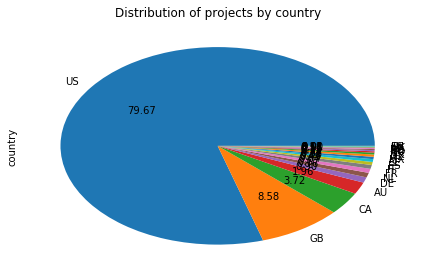

In [43]:
data['country'].value_counts().plot.pie(autopct='%.2f')
plt.title('Distribution of projects by country')
plt.tight_layout()

**Viewing the percentage of successful projects**

Text(0.5,1,'Distribution of successful (1)/failed (0) projects')

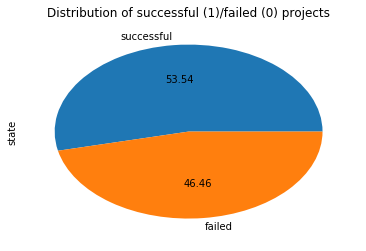

In [44]:
data['state'].value_counts().plot.pie(autopct='%.2f')
plt.title('Distribution of successful (1)/failed (0) projects')

**Setting the right goal is as important as you'd think** <br>
The median goal for a successful campaign from the dataset is USD 5,000 while the medial goal for failed campaigns is nearly USD 17,000. We also found that 38% of failed campaigns had a goal of over USD 50,000.
data.boxplot('goal',by='success')

In [45]:
data["goal"].describe()

count    1.570820e+05
mean     4.668282e+04
std      1.225366e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.299975e+04
max      1.000000e+08
Name: goal, dtype: float64

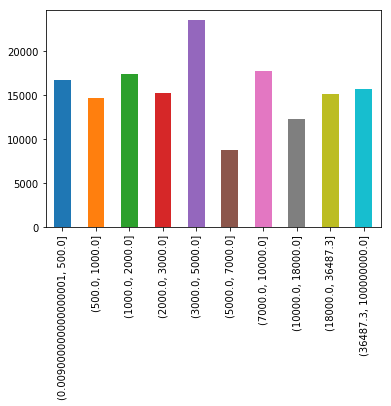

In [46]:
pd.qcut(data['goal'], 10).value_counts().sort_index().plot(kind='bar')

In [47]:
stats = pd.DataFrame(data.groupby(['state']).size())
stats['Project proportion(%)'] = round((data.groupby(['state']).size()/sum(data.groupby(['state']).size()))*100,2)
stats['Project goal total($)'] = round((data.groupby(['state'])['goal'].sum()),2).astype(str)
stats['Project average goal($)'] = round(data.groupby(['state'])['goal'].mean(),2)
stats['Amount Pledged($)'] = round((data.groupby(['state'])['usd_pledged'].sum()),2).astype(str)
stats['Average pledged($)'] = round(data.groupby(['state'])['usd_pledged'].mean(),2)
stats['Backers Count'] = data.groupby(['state'])['backers_count'].sum()
stats.columns.values[0]='Projects'

In [48]:
stats.transpose()

state,failed,successful
Projects,72987,84095
Project proportion(%),46.46,53.54
Project goal total($),6528722007.65,804308868.86
Project average goal($),89450.5,9564.29
Amount Pledged($),85589597.23,1552407471.33
Average pledged($),1172.67,18460.2
Backers Count,959068,18851466


Distribution of campaigns by category

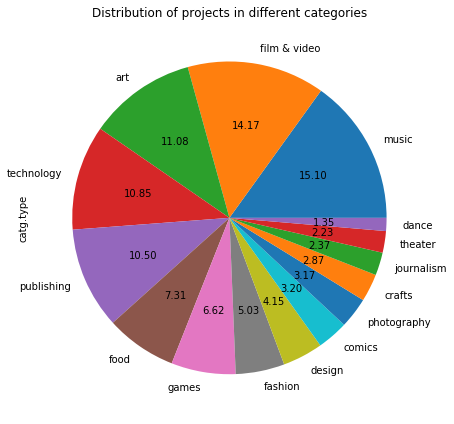

In [49]:
data['catg.type'].value_counts().plot.pie(autopct='%.2f',figsize=(6,6))
plt.title('Distribution of projects in different categories')
plt.tight_layout()

The dominating categories are music, film and video, art and technology.

**Kickstarter is home to tech-enthusiast**<br>
Campaign success by category

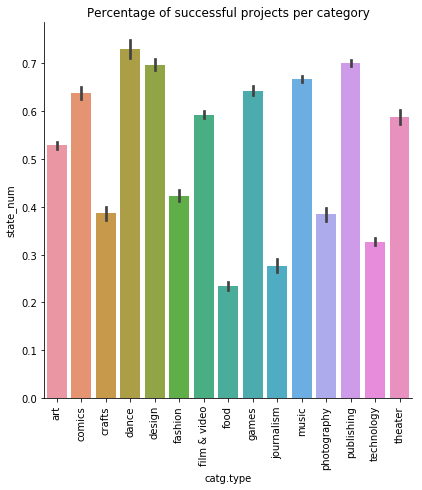

In [50]:
sns.factorplot(x='catg.type', y='state_num', kind='bar', data=data, size=6)
locs, labels = plt.xticks();
plt.title('Percentage of successful projects per category')
plt.setp(labels, rotation=90);

The categories having the smallest proportion of success are journalism, food and technology.

## Are goals set by failed projects unrealistic?

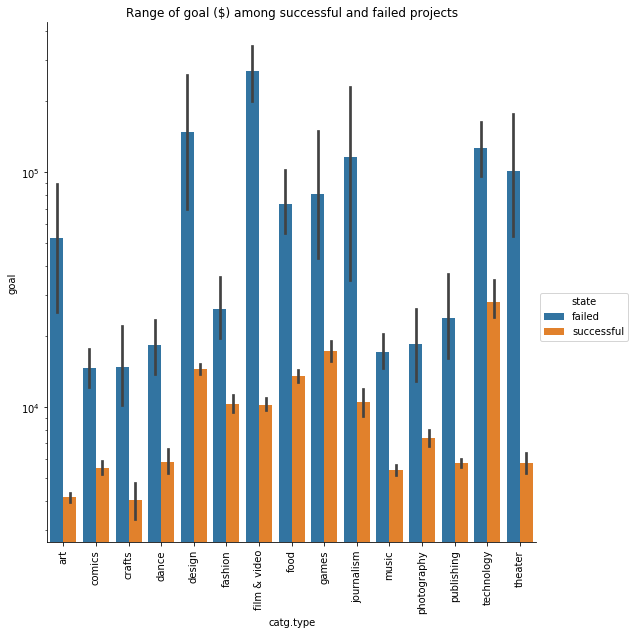

In [51]:
sns.factorplot(x='catg.type', y='goal', hue='state', kind='bar', data=data, size=8)
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.title('Range of goal ($) among successful and failed projects')
plt.gca().set_yscale("log", nonposy='clip');

From the comparison above, per main category, there is a clear separation of range of goals ($) between successful and failed cases. The successful cases have way lower/achievable goal compared to the failed cases.

Simple quality check: Let's check to make sure no launch dates came after before deadline dates

In [52]:
np.any(data.deadline < data.launched_at)

False

In [53]:
data.launched_at_yr.value_counts()

2015    34358
2014    31423
2016    21941
2017    18126
2012    16877
2013    15280
2011    12269
2010     6114
2009      691
2018        3
Name: launched_at_yr, dtype: int64

**Creation of campaigns varies by time** <br>
The following plot will look at counts in campaigns from 2009 to 2018 grouped by month.

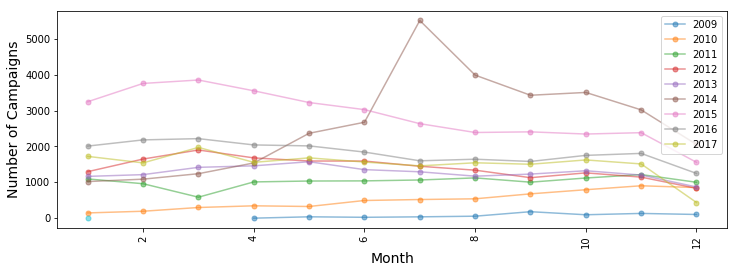

In [54]:
def plot_monthly_campaign_count(n):
    
    mth = data[data['launched_at_yr'] == n]
    mth_cnt = mth.groupby('launched_at_mo').count()['count']
    mth_cnt.plot(marker='o', markersize=5, alpha=.5, rot=90)

fig = plt.figure(figsize=(12, 4))
for i in range(2009, 2019):
    plot_monthly_campaign_count(i)
plt.ylabel('Number of Campaigns', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.legend(range(2009, 2018))
plt.show()

Peak campaign count occured in the month of july in 2014. What caused that? Not really any seasonality is readily apparent.

In [55]:
pd.crosstab(data.launched_at_mo, data.launched_at_yr)

launched_at_yr,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
launched_at_mo,,,,,,,,,,
1,0,149,1095,1298,1166,1022,3245,2010,1723,3
2,0,196,962,1649,1215,1089,3754,2182,1542,0
3,0,300,587,1901,1418,1241,3849,2217,1973,0
4,3,347,1012,1681,1460,1540,3549,2042,1557,0
5,41,328,1037,1594,1574,2366,3222,2015,1682,0
6,27,495,1041,1593,1354,2673,3025,1843,1565,0
7,40,522,1066,1448,1294,5506,2634,1600,1459,0
8,58,542,1124,1339,1172,3985,2388,1644,1545,0
9,183,680,1005,1130,1230,3425,2406,1582,1504,0


**Staff picks have significant impact on success**<br>
Kickstarter's staff picks are given high-value front page

In [56]:
staff_picked = data.staff_pick.value_counts()
print("Not so nice, ~ %g%% are staff picked" % (staff_picked[1] * 100 / staff_picked.sum()).round())

Not so nice, ~ 13% are staff picked


In [57]:
pd.crosstab(data.staff_pick, data.success)

success,False,True
staff_pick,,
False,70442,66625
True,2545,17470


Staff picks are another variable of interest we are interested in determining. I can perform the same sort of analysis I will make in this notebook to staff picks. We would be interested in finding which features are associated with higher probabilities of Kickstarter staff choosing a campaign to tag with the staff pick criteria. This seems to boost backer confidence and is associated with a higher probability of success.

**Creation of campaigns varies by time** <br>

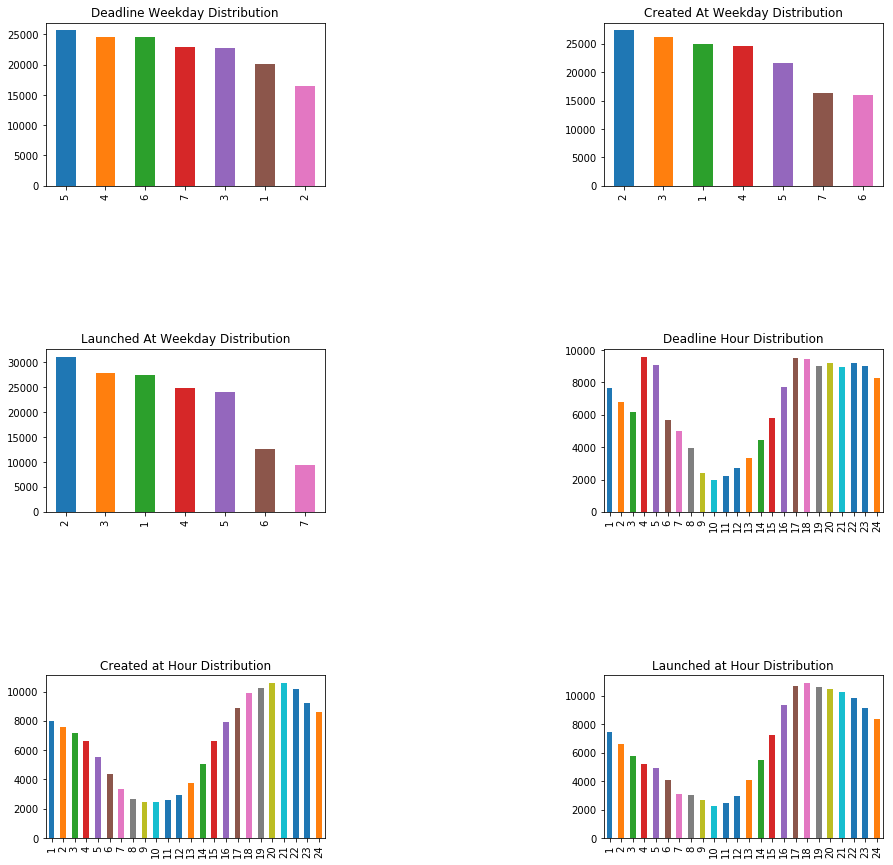

In [66]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.subplots_adjust(hspace=1, wspace = 1)
data['deadline_dow'].value_counts().plot(kind = 'bar',ax=axes[0,0], title = 'Deadline Weekday Distribution', figsize=(15,15))
data['created_at_dow'].value_counts().plot(kind = 'bar',ax=axes[0,1], title = 'Created At Weekday Distribution', figsize=(15,15))
data['launched_at_dow'].value_counts().plot(kind = 'bar',ax=axes[1,0], title = 'Launched At Weekday Distribution', figsize=(15,15))
data['deadline_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[1,1], title = 'Deadline Hour Distribution', figsize=(15,15))
data['created_at_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[2,0], title = 'Created at Hour Distribution', figsize=(15,15))
data['launched_at_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[2,1], title = 'Launched at Hour Distribution', figsize=(15,15))

**Successful campaigns invest more time in creating the campaign.** <br>
The median number of days spend between creation and launch for successful campaign is

In [67]:
data['launched-created'].describe()

count    157082.000000
mean         39.321437
std         104.201581
min           0.000000
25%           2.000000
50%           9.000000
75%          32.000000
max        2313.000000
Name: launched-created, dtype: float64

In [68]:
data['launched-created'].median()

9.0

In [69]:
data['deadline-launched'].describe()

count    157082.000000
mean         33.506920
std          12.711859
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          91.000000
Name: deadline-launched, dtype: float64

In [70]:
data['deadline-launched'].median()

30.0

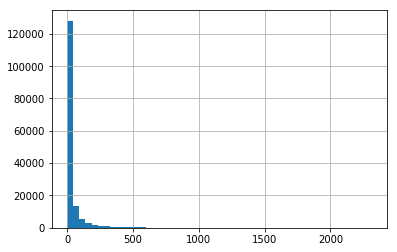

In [71]:
data['launched-created'].hist(bins=50)

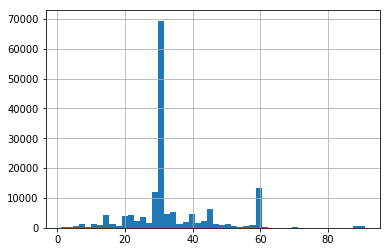

In [72]:
data['deadline-launched'].hist(bins=50)

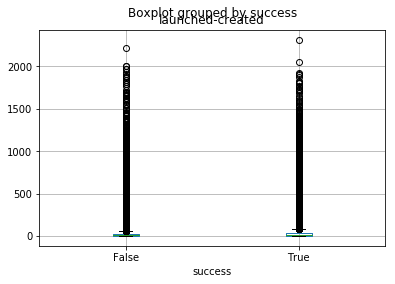

In [73]:
data.boxplot('launched-created', by='success')

Let's look into the time components of the created, launched and deadline timestamps a bit more.

Text(0.5,1,'Deadline weekday Distribution')

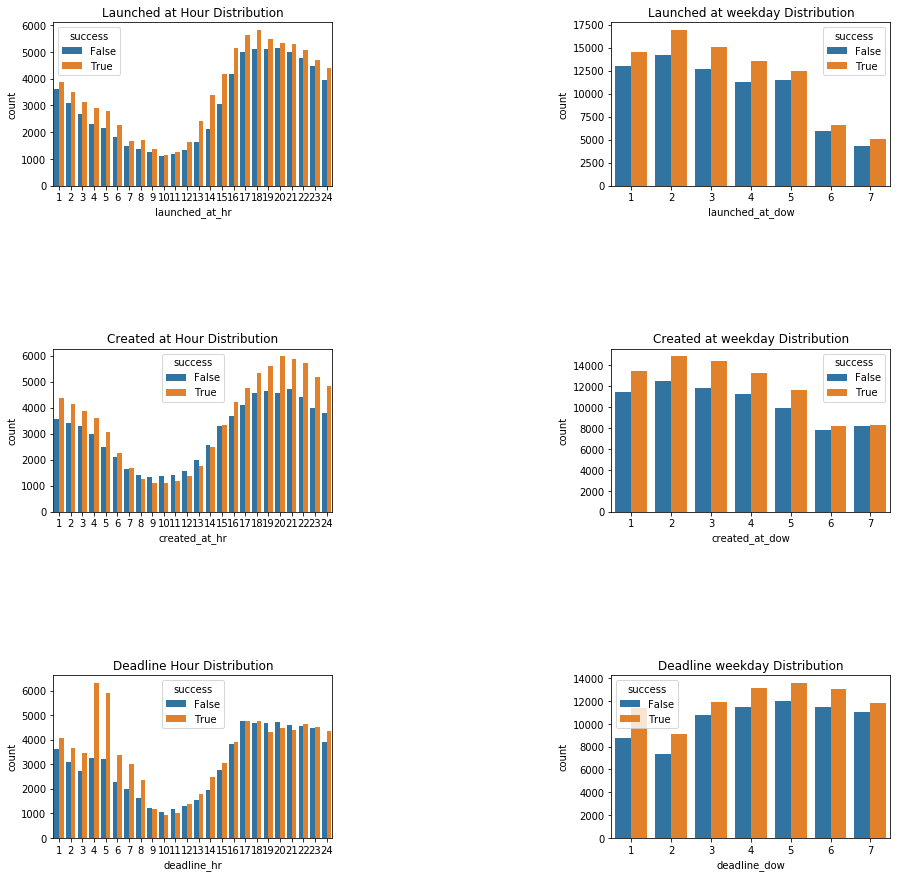

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace = 1)

sns.countplot(x="launched_at_hr", hue="success", data=data, ax=axes[0, 0]).set_title('Launched at Hour Distribution')
sns.countplot(x="created_at_hr", hue="success", data=data, ax=axes[1, 0]).set_title('Created at Hour Distribution')
sns.countplot(x="deadline_hr", hue="success", data=data, ax=axes[2, 0]).set_title('Deadline Hour Distribution')
sns.countplot(x="launched_at_dow", hue="success", data=data, ax=axes[0, 1]).set_title('Launched at weekday Distribution')
sns.countplot(x="created_at_dow", hue="success", data=data, ax=axes[1, 1]).set_title('Created at weekday Distribution')
sns.countplot(x="deadline_dow", hue="success", data=data, ax=axes[2, 1]).set_title('Deadline weekday Distribution')

From this data we an see somewhat of a difference between success and failure in the hour distributions. I think it's possible we can use these effects. Let's try to get the text feature lengths as well:

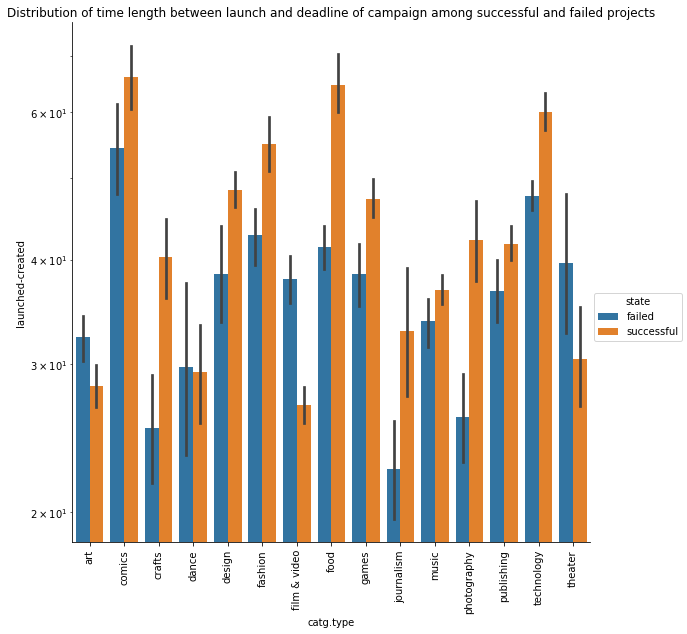

In [75]:
sns.factorplot(x='catg.type', y='launched-created', hue='state', kind='bar', data=data, size=8)
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.title('Distribution of time length between launch and deadline of campaign among successful and failed projects')
plt.gca().set_yscale("log", nonposy='clip');

After a establishing understanding of the Kickstarter nature of campaign creators, drivers that promotes success are  determined. Potential features are studied and a t-test is performed to determine whether the feature can be used to significantly distinguish successful campaigns from failed ones.

<h3><a id='s4'>Building the Models</a></h3>

In the search for the best model, four algorithms were investigated:

* [Random Forest](#rf)
* [Adaptive Boosting](#ada)
* [Gradient Boosting](#xg)
* [Logistic Regression](#lg)

These classification models were chosen due to their predictive power in binary classification problems. Adaptive and Gradient Boosting are both boosting methods which choose to train one strong learner (the overfitting decision tree) on multiple weak learners (underfitting learners) in sequence.

To avoid overfitting due to our limited dataset, functions for cross-validation and parameter optimization were defined such that they are applicable on either classification or regression algorithm

<h4><center>...</center></h4>

**K Fold Cross Validation:**

This function (**modelfit**) train the model given as 'alg' by performing cross-validation. It works on both regression and classification

* **alg**: sklearn model
* **dtrain**: pandas.DataFrame, training set
* **predictors**: list, labels of features (column names) to be used in the model training
* **target**: str, target variable
* **scoring_method**: str, method to be used by the cross-validation to valuate the model
* **performCV**: bool, perform Cv or not
* **printFeatureImportance**: bool, plot histogram of features importance or not
* **cv_folds**: int, degree of cross-validation

In [11]:
%%capture
# import scikit learn libraries
from sklearn import cross_validation, metrics   #model optimization and valuation tools
from sklearn.grid_search import GridSearchCV   #Perforing grid search

# define a function that help to train models and perform cv
def modelfit(alg,dtrain,predictors,target,scoring_method,performCV=True,printFeatureImportance=True,cv_folds=5):

    # train the algorithm on data
    alg.fit(dtrain[predictors],dtrain[target])
    
    #predict on train set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    if scoring_method == 'roc_auc':
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #perform cross-validation
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,dtrain[predictors],dtrain[target],cv=cv_folds,scoring=scoring_method)
        
        #print model report
        print ("\nModel report:")
        if scoring_method == 'roc_auc':
            print ("Accuracy: %.4f" % metrics.accuracy_score(dtrain[target].values,dtrain_predictions))
            print ("AUC Score (Train): %.4f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
        if (scoring_method == 'mean_squared_error'):
            print ("Accuracy: %.4f" % metrics.mean_squared_error(dtrain[target].values,dtrain_predictions))
    if performCV:
        print ("CV Score: Mean : %.5g | Std : %.5g | Min : %.5g | Max : %.5g \n" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #print feature importance
    if printFeatureImportance:
        if dir(alg)[0] == '_Booster': #runs only if alg is xgboost
            feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
        else:
            feat_imp = pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances')
        plt.ylabel('Feature Importe Score')
        plt.show()

**Optimize Number of Desicion Trees:**

This function, (**optimize_num_trees**), is used to tune paremeters of a predictive algorithm

* **alg**: sklearn model
* **param_test**: dict, parameters to be tuned
* **scoring_method**: str, method to be used by the cross-validation to valuate the model
* **train**: pandas.DataFrame, training data
* **predictors**: list, labels to be used in the model training process. They should be in the column names of dtrain
* **target**: str, target variable

In [12]:
# optimize n_estimator through grid search
def optimize_num_trees(alg,param_test,scoring_method,train,predictors,target):
    gsearch = GridSearchCV(estimator=alg, param_grid = param_test, scoring=scoring_method,n_jobs=2,iid=False,cv=5)
    gsearch.fit(train[predictors],train[target])
    
    return gsearch

# plot optimization results
def plot_opt_results(alg):
    cv_results = []
    for i in range(len(param_test['n_estimators'])):
        cv_results.append((alg.grid_scores_[i][1],alg.grid_scores_[i][0]['n_estimators']))
    cv_results = pd.DataFrame(cv_results)
    plt.plot(cv_results[1],cv_results[0])
    plt.xlabel('# trees')
    plt.ylabel('score')
    plt.title('optimization report')

<h2><a id='rf'>Random Forest</a></h2>

* Optimized number of trees: TBD
* Optimized predictors (in order of importance):     
    1. Category.id
    2. Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**

Optimizing the classifier...

Search grid results:
params (best): 70
score (best): 0.7905

Model report:
Accuracy: 0.7316
AUC Score (Train): 0.8059
CV Score: Mean : 0.7905 | Std : 0.011827 | Min : 0.77529 | Max : 0.80948 



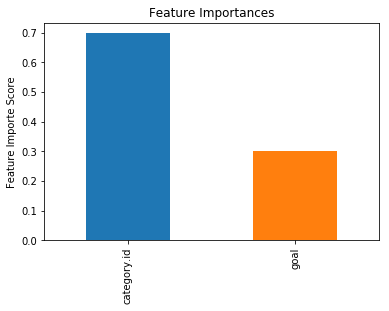


 Processing time: 0:00:06.011068


In [13]:
from sklearn.ensemble import RandomForestClassifier
print ("Optimizing the classifier...")

train = data.copy() # make a copy of the training set
# since the dataset is too big for my system, select a small sample size to carry on training and 5 folds cross validation
train = train.loc[np.random.choice(train.index,size=5000,replace=False)]
target = 'success' # set target variable - it will be used later in optimization

tic = dt.datetime.now() # initiate the timing
# for predictors start with candidates identified during the EDA
predictors = ['category.id',
              'goal']

# optimize n_estimator through grid search
param_test = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

# initiate classification model
model_cls = RandomForestClassifier(
    min_samples_split=2,# use default
    max_depth=5,
    max_features='auto',
    random_state = 10)

# get results of the search grid
gs_cls = optimize_num_trees(model_cls,param_test,'roc_auc',train,predictors,target)
print("\nSearch grid results:")
print("params (best):", gs_cls.best_params_['n_estimators']) 
print("score (best): %.4f" % gs_cls.best_score_)

# cross validate the best model with optimized number of estimators
modelfit(gs_cls.best_estimator_,train,predictors,target,'roc_auc')
     
print ("\n Processing time:", dt.datetime.now()-tic)

**Let’s test it by doing prediction on a test dataset**

In [14]:
# test
indices = data.index[~data.index.isin(train.index)]
test = data.loc[np.random.choice(indices,size=5000,replace=False)]

RFpred = gs_cls.best_estimator_.predict(test[predictors])

print("ROC AUC: %.4f " % metrics.roc_auc_score(RFpred,test.success))

ROC AUC: 0.7121 


<h2><a id='xg'>Gradient Boosting</a></h2>

* Optimized number of trees: TBD
* Optimized predictors (in order of importance):     
    1. Category.id
    2. Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**

Optimizing the classifier...

Search grid results:
params (best): 90
score (best): 0.8161

Model report:
Accuracy: 0.8002
AUC Score (Train): 0.8901
CV Score: Mean : 0.81614 | Std : 0.0076878 | Min : 0.80584 | Max : 0.82732 



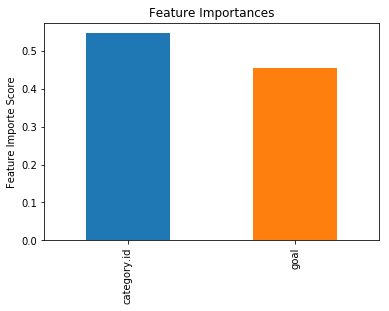


 Processing time: 0:00:08.345572


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
print ("Optimizing the classifier...")

train = data.copy() # make a copy of the training set
# since the dataset is too big for my system, select a small sample size to carry on training and 5 folds cross validation
train = train.loc[np.random.choice(train.index,size=5000,replace=False)]
target = 'success' # set target variable - it will be used later in optimization

tic = dt.datetime.now() # initiate the timing
# for predictors start with candidates identified during the EDA
predictors = ['category.id',
              'goal']

# optimize n_estimator through grid search
param_test = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

# initiate classification model
model_cls = GradientBoostingClassifier(
    learning_rate=0.1, # use default
    min_samples_split=2,# use default
    max_depth=5,
    max_features='auto',
    subsample=0.8, # try <1 to decrease variance and increase bias
    random_state = 10)

# get results of the search grid
gs_cls = optimize_num_trees(model_cls,param_test,'roc_auc',train,predictors,target)
print("\nSearch grid results:")
print("params (best):", gs_cls.best_params_['n_estimators']) 
print("score (best): %.4f" % gs_cls.best_score_)

# cross validate the best model with optimized number of estimators
modelfit(gs_cls.best_estimator_,train,predictors,target,'roc_auc')
     
print ("\n Processing time:", dt.datetime.now()-tic)

**Let’s test it by doing prediction on a test dataset**

In [16]:
# test
indices = data.index[~data.index.isin(train.index)]
test = data.loc[np.random.choice(indices,size=5000,replace=False)]

XGpred = gs_cls.best_estimator_.predict(test[predictors])

print("ROC AUC: %.4f " % metrics.roc_auc_score(XGpred,test.success))

ROC AUC: 0.7392 


<h2><a id='ada'>Adaptive Boosting</a></h2>

* Optimized number of trees: TBD
* Optimized predictors (in order of importance):     
    1. Category.id
    2. Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**

Optimizing the classifier...

Search grid results:
params (best): 150
score (best): 0.7730

Model report:
Accuracy: 0.7052
AUC Score (Train): 0.7770
CV Score: Mean : 0.77302 | Std : 0.0071019 | Min : 0.7636 | Max : 0.78065 



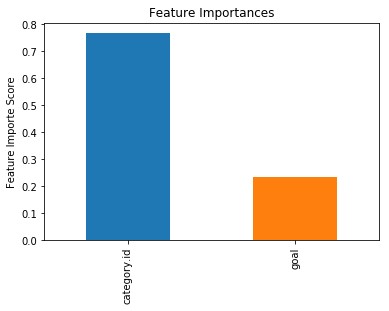


 Processing time: 0:00:07.733594


In [17]:
from sklearn.ensemble import AdaBoostClassifier
print ("Optimizing the classifier...")

train = data.copy() # make a copy of the training set
# since the dataset is too big for my system, select a small sample size to carry on training and 5 folds cross validation
train = train.loc[np.random.choice(train.index,size=5000,replace=False)]
target = 'success' # set target variable - it will be used later in optimization

tic = dt.datetime.now() # initiate the timing
# for predictors start with candidates identified during the EDA
predictors = ['category.id',
              'goal']

# optimize n_estimator through grid search
param_test = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

# initiate classification model
model_cls = AdaBoostClassifier(
    learning_rate=0.1, # use default
    random_state = 10)

# get results of the search grid
gs_cls = optimize_num_trees(model_cls,param_test,'roc_auc',train,predictors,target)
print("\nSearch grid results:")
print("params (best):", gs_cls.best_params_['n_estimators']) 
print("score (best): %.4f" % gs_cls.best_score_)

# cross validate the best model with optimized number of estimators
modelfit(gs_cls.best_estimator_,train,predictors,target,'roc_auc')
     
print ("\n Processing time:", dt.datetime.now()-tic)

**Let’s test it by doing prediction on a test dataset**

In [18]:
# test
indices = data.index[~data.index.isin(train.index)]
test = data.loc[np.random.choice(indices,size=5000,replace=False)]

ADApred = gs_cls.best_estimator_.predict(test[predictors])

print("ROC AUC: %.4f " % metrics.roc_auc_score(ADApred,test.success))

ROC AUC: 0.7008 


<h3><a id='lg'>Logistic Regression</a></h3>

* Optimized predictors (in order of importance):     
    1. Category.id
    2. Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**

**Let’s test it by doing prediction on a test dataset**

<h2><a id='model'>Implementation</a></h2>

benefits for

Investors:

Civilian backers:

Campaign Creators: